In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# (i) Load the dataset
data = pd.read_csv('/content/winequality-red.csv')

# (i) Create a new column for good quality wines
data['good_quality'] = (data['quality'] >= 7).astype(int)

# Drop the original 'quality' column
data = data.drop('quality', axis=1)

# (ii) Data Pre-processing
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Check for outliers and remove them (you may choose a different method based on the distribution of your data)
# For simplicity, we'll use z-score for outlier detection and removal
z_scores = (data - data.mean()) / data.std()
data = data[(z_scores.abs() < 3).all(axis=1)]

# Create correlation matrix
correlation_matrix = data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Normalize the data
scaler = StandardScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])

# (iii) Apply Classification Algorithms
# Split the data into features (X) and target variable (y)
X = data.drop('good_quality', axis=1)
y = data['good_quality']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Trees Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# (iv) Evaluate Models
# Decision Trees Classifier
print("\nDecision Trees Classifier:")
print("Accuracy Score:", accuracy_score(y_test, dt_predictions))
print("F1 Score:", f1_score(y_test, dt_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_predictions))
print("Classification Report:")
print(classification_report(y_test, dt_predictions))

# Random Forest Classifier
print("\nRandom Forest Classifier:")
print("Accuracy Score:", accuracy_score(y_test, rf_predictions))
print("F1 Score:", f1_score(y_test, rf_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))
print("Classification Report:")
print(classification_report(y_test, rf_predictions))



Missing Values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
good_quality            0
dtype: int64
Correlation Matrix:
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.296566     0.699747   
volatile acidity          -0.296566          1.000000    -0.589286   
citric acid                0.699747         -0.589286     1.000000   
residual sugar             0.175809          0.032331     0.178784   
chlorides                  0.187853          0.070307     0.104950   
free sulfur dioxide       -0.146702          0.008824    -0.072097   
total sulfur dioxide      -0.098843          0.104585     0.007320   
density                    0.660497         -0.000446     0.372338   
pH       

<ipython-input-1-5208519a43c4>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])



Decision Trees Classifier:
Accuracy Score: 0.8767123287671232
F1 Score: 0.4857142857142857
Confusion Matrix:
[[239  19]
 [ 17  17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       258
           1       0.47      0.50      0.49        34

    accuracy                           0.88       292
   macro avg       0.70      0.71      0.71       292
weighted avg       0.88      0.88      0.88       292


Random Forest Classifier:
Accuracy Score: 0.9041095890410958
F1 Score: 0.48148148148148157
Confusion Matrix:
[[251   7]
 [ 21  13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       258
           1       0.65      0.38      0.48        34

    accuracy                           0.90       292
   macro avg       0.79      0.68      0.71       292
weighted avg       0.89      0.90      0.89       292



Missing Values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
good_quality            0
dtype: int64
Correlation Matrix:
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.296566     0.699747   
volatile acidity          -0.296566          1.000000    -0.589286   
citric acid                0.699747         -0.589286     1.000000   
residual sugar             0.175809          0.032331     0.178784   
chlorides                  0.187853          0.070307     0.104950   
free sulfur dioxide       -0.146702          0.008824    -0.072097   
total sulfur dioxide      -0.098843          0.104585     0.007320   
density                    0.660497         -0.000446     0.372338   
pH       

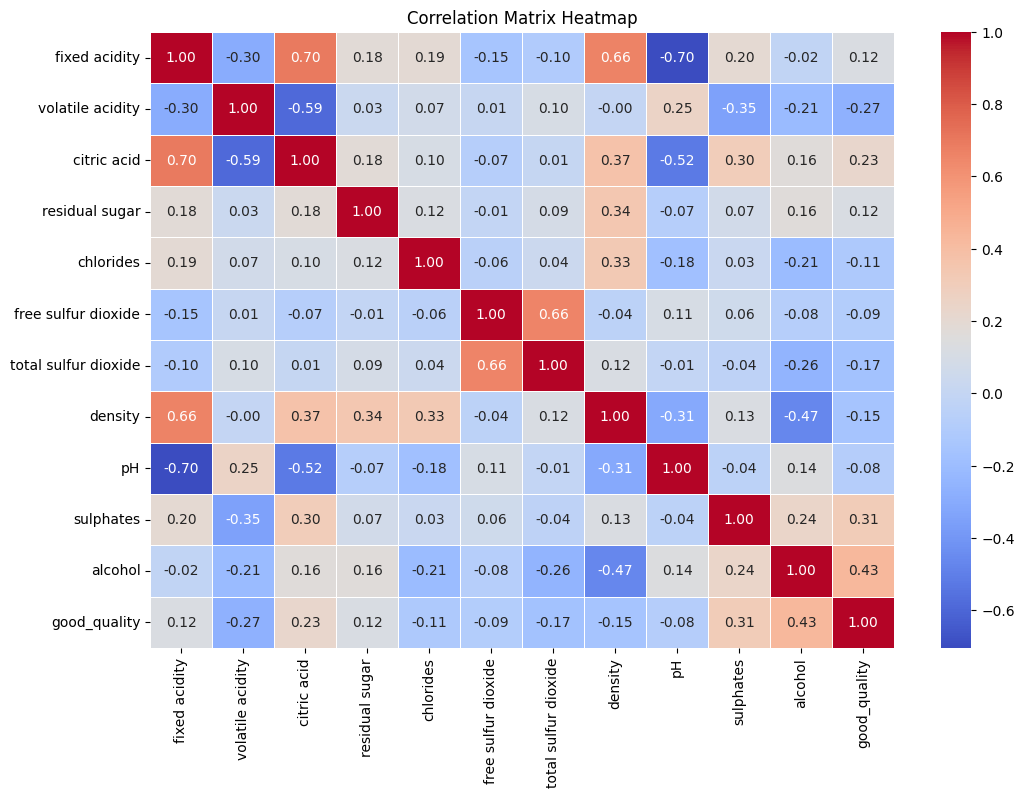


Decision Trees Classifier:
Accuracy Score: 0.8767123287671232
F1 Score: 0.4857142857142857
Confusion Matrix:
[[239  19]
 [ 17  17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       258
           1       0.47      0.50      0.49        34

    accuracy                           0.88       292
   macro avg       0.70      0.71      0.71       292
weighted avg       0.88      0.88      0.88       292


Random Forest Classifier:
Accuracy Score: 0.9041095890410958
F1 Score: 0.48148148148148157
Confusion Matrix:
[[251   7]
 [ 21  13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       258
           1       0.65      0.38      0.48        34

    accuracy                           0.90       292
   macro avg       0.79      0.68      0.71       292
weighted avg       0.89      0.90      0.89       292



In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# (i) Load the dataset
data = pd.read_csv('/content/winequality-red.csv')

# (i) Create a new column for good quality wines
data['good_quality'] = (data['quality'] >= 7).astype(int)

# Drop the original 'quality' column
data = data.drop('quality', axis=1)

# (ii) Data Pre-processing
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Check for outliers and remove them (you may choose a different method based on the distribution of your data)
# For simplicity, we'll use z-score for outlier detection and removal
z_scores = (data - data.mean()) / data.std()
data = data[(z_scores.abs() < 3).all(axis=1)]

# Create correlation matrix
correlation_matrix = data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Plot heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Normalize the data
scaler = StandardScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])

# (iii) Apply Classification Algorithms
# Split the data into features (X) and target variable (y)
X = data.drop('good_quality', axis=1)
y = data['good_quality']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Trees Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# (iv) Evaluate Models
# Decision Trees Classifier
print("\nDecision Trees Classifier:")
print("Accuracy Score:", accuracy_score(y_test, dt_predictions))
print("F1 Score:", f1_score(y_test, dt_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_predictions))
print("Classification Report:")
print(classification_report(y_test, dt_predictions))

# Random Forest Classifier
print("\nRandom Forest Classifier:")
print("Accuracy Score:", accuracy_score(y_test, rf_predictions))
print("F1 Score:", f1_score(y_test, rf_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))
print("Classification Report:")
print(classification_report(y_test, rf_predictions))
